In [1]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Load Pre-trained Inception V3 Model 
local_weights_file = "/Users/gowtham/Downloads/AnimalSkinDiseasePrediction_CNN-main/src/TransferLearning/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
pre_trained_model = InceptionV3(input_shape=(150, 150, 3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

# Freezing the pre-trained layers so they are not modified during training
for layer in pre_trained_model.layers:
    layer.trainable = False

print("Pre-trained Inception V3 model loaded and layers frozen.")

# Dataset Directories
TRAINING_DIR = "/Users/gowtham/Downloads/AnimalSkinDiseasePrediction_CNN-main/src/Train"
VALIDATION_DIR = "/Users/gowtham/Downloads/AnimalSkinDiseasePrediction_CNN-main/src/Validation"

# Data Augmentation applying transformations(rotation,zoom,shift)
training_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values between 0 and 1
    rotation_range=30,  # Randomly rotate images
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    shear_range=0.2,  # Shearing transformation
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'  # Fill in missing pixels after transformation
)

# Load Training Data
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    batch_size=5,
    class_mode='categorical'  # Multi-class classification
)

print("Training dataset loaded and augmented.")


Pre-trained Inception V3 model loaded and layers frozen.
Found 75 images belonging to 3 classes.
Training dataset loaded and augmented.


In [2]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout


# Add Custom Classifier
last_layer = pre_trained_model.get_layer('mixed7')  # Get last useful feature layer
last_output = last_layer.output

x = Flatten()(last_output)  # Convert feature map into a vector
x = Dense(64, activation='relu')(x)  # Fully connected layer
x = Dropout(0.2)(x)  # Prevent overfitting
x = Dense(3, activation='softmax')(x)  # multi class classification Output layer for 3 classes (Healthy, Fungal, Bacterial)

# Define the final model
model = Model(pre_trained_model.input, x)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.save('/Users/gowtham/Downloads/AnimalSkinDiseasePrediction_CNN-main/model/model_with_classifier.h5')

print("Custom classifier added. Model saved as 'model_with_classifier.h5'. Ready for training!")


Pre-trained Inception V3 model loaded and layers frozen.
Custom classifier added. Model saved as 'model_with_classifier.h5'. Ready for training!


In [3]:



# Load the model with classifier
model = tf.keras.models.load_model('/Users/gowtham/Downloads/AnimalSkinDiseasePrediction_CNN-main/model/model_with_classifier.h5')

# Dataset paths
TRAINING_DIR = "/Users/gowtham/Downloads/AnimalSkinDiseasePrediction_CNN-main/src/Train"
VALIDATION_DIR = "/Users/gowtham/Downloads/AnimalSkinDiseasePrediction_CNN-main/src/Validation"

# Data Augmentation 
training_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation datasets
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    batch_size=5,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150, 150),
    batch_size=5,
    class_mode='categorical'
)

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator
)

# Save the trained model
model.save('/Users/gowtham/Downloads/AnimalSkinDiseasePrediction_CNN-main/model/trained_model.h5')

print("Model training completed and saved as 'trained_model.h5'.")


Found 75 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Epoch 1/50


2025-02-09 18:28:48.963436: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2025-02-09 18:28:48.986071: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


15/15 [==============================] - ETA: 0s - loss: 1.1327 - accuracy: 0.4133

2025-02-09 18:28:50.847091: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


15/15 [==============================] - 2s 98ms/step - loss: 1.1327 - accuracy: 0.4133 - val_loss: 0.8703 - val_accuracy: 0.7333
Epoch 2/50
15/15 [==============================] - 1s 70ms/step - loss: 0.9113 - accuracy: 0.6667 - val_loss: 0.8282 - val_accuracy: 0.5333
Epoch 3/50
15/15 [==============================] - 1s 76ms/step - loss: 0.7702 - accuracy: 0.6667 - val_loss: 0.6949 - val_accuracy: 0.6000
Epoch 4/50
15/15 [==============================] - 1s 73ms/step - loss: 0.5895 - accuracy: 0.7467 - val_loss: 0.5835 - val_accuracy: 0.6333
Epoch 5/50
15/15 [==============================] - 1s 69ms/step - loss: 0.6110 - accuracy: 0.7600 - val_loss: 0.5830 - val_accuracy: 0.7000
Epoch 6/50
15/15 [==============================] - 1s 71ms/step - loss: 0.5283 - accuracy: 0.7467 - val_loss: 0.5015 - val_accuracy: 0.7667
Epoch 7/50
15/15 [==============================] - 1s 73ms/step - loss: 0.4699 - accuracy: 0.8133 - val_loss: 0.4583 - val_accuracy: 0.7333
Epoch 8/50
15/15 [======

1/1 [==============================] - 0s 21ms/step


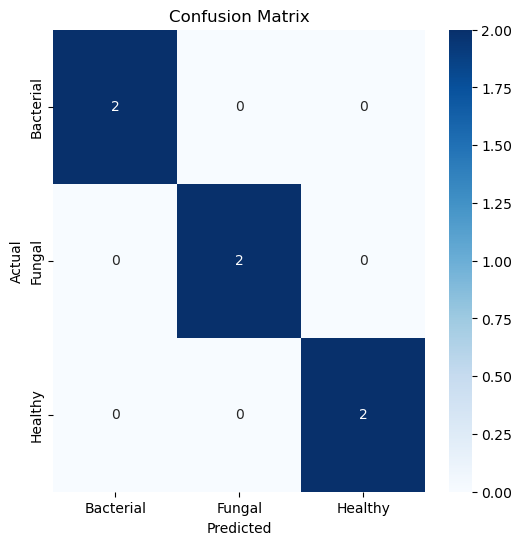

Classification Report:
              precision    recall  f1-score   support

   Bacterial       1.00      1.00      1.00         2
      Fungal       1.00      1.00      1.00         2
     Healthy       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [5]:
import os
import re
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report

# Load the trained model
model = tf.keras.models.load_model('/Users/gowtham/Downloads/AnimalSkinDiseasePrediction_CNN-main/model/trained_model.h5')


class_labels = ["Bacterial", "Fungal", "Healthy"]

# Function to preprocess and predict a single image
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Resize to model input size
    img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]  # Get class index
    return class_labels[predicted_class]

# Extract the actual class from filenames
def extract_label(filename):
    label = re.sub(r'\d+', '', filename)  # Remove numbers (e.g., "Healthy2" -> "Healthy")
    label = label.split(".")[0]  # Remove file extension
    label = label.capitalize()  # Ensure first letter is uppercase
    return label

# Evaluate Model on a Batch of Test Images
test_dir = "/Users/gowtham/Downloads/AnimalSkinDiseasePrediction_CNN-main/src/Test"
true_labels = []
predicted_labels = []

for img_name in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_name)

    # Extract class name from filename
    true_class = extract_label(img_name)
    
    # Make sure extracted class is valid
    if true_class not in class_labels:
        print(f"Skipping unknown class: {true_class}")
        continue

    predicted_class = predict_image(img_path)

    true_labels.append(true_class)
    predicted_labels.append(predicted_class)

# Generate Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=class_labels)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=class_labels, yticklabels=class_labels, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Generate Classification Report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_labels))
